In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Morpeth_rainfall = pd.read_csv(os.path.join(path, 'Morpeth_rainfall.csv'))
Morpeth_water = pd.read_csv(os.path.join(path, 'Morpeth_water.csv'))

In [2]:
Morpeth_rainfall['dateTime'] = pd.to_datetime(Morpeth_rainfall['dateTime'])
Morpeth_water['dateTime'] = pd.to_datetime(Morpeth_water['dateTime'])

In [3]:
Morpeth_water.set_index('dateTime', inplace=True)
Morpeth_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('01/01/2017 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('31/12/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
Morpeth_water_subset = Morpeth_water.loc[(Morpeth_water.index >= start_date) & (Morpeth_water.index <= end_date)]
Morpeth_rainfall_subset = Morpeth_rainfall.loc[(Morpeth_rainfall.index >= start_date) & (Morpeth_rainfall.index <= end_date)]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
merged_data = pd.merge(Morpeth_rainfall_subset, Morpeth_water_subset, on='dateTime', how='inner')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [8]:
train_data = merged_data[:112128]
test_data = merged_data[112128:]

In [9]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [11]:
Ridge_Mor_96in_48out = Ridge()
cv_scores_Mor_96in_48out_Ridge = cross_val_score(Ridge_Mor_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [12]:
cv_scores_Mor_96in_48out_Ridge = -cv_scores_Mor_96in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_96in_48out_Ridge)
print("Mean MSE:", cv_scores_Mor_96in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_48out_Ridge.std())

Cross-validation scores:
[0.00095928 0.00162747 0.00011814 0.00147094 0.00197531]
Mean MSE: 0.0012302297675099512
Standard Deviation MSE: 0.0006451420682901328


In [13]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
Ridge_Mor_48in_48out = Ridge()
cv_scores_Mor_48in_48out_Ridge = cross_val_score(Ridge_Mor_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_48in_48out_Ridge = -cv_scores_Mor_48in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_48in_48out_Ridge)
print("Mean MSE:", cv_scores_Mor_48in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_48out_Ridge.std())

Cross-validation scores:
[0.00098801 0.00162141 0.00012853 0.001389   0.0019986 ]
Mean MSE: 0.0012251118901760796
Standard Deviation MSE: 0.0006388902458401459


In [15]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
Ridge_Mor_24in_48out = Ridge()
cv_scores_Mor_24in_48out_Ridge = cross_val_score(Ridge_Mor_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_24in_48out_Ridge = -cv_scores_Mor_24in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_24in_48out_Ridge)
print("Mean MSE:", cv_scores_Mor_24in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_48out_Ridge.std())

Cross-validation scores:
[0.00101089 0.00159162 0.00013708 0.00143127 0.0020489 ]
Mean MSE: 0.0012439519110179844
Standard Deviation MSE: 0.0006455043798403263


In [17]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
Ridge_Mor_96in_32out = Ridge()
cv_scores_Mor_96in_32out_Ridge = cross_val_score(Ridge_Mor_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_96in_32out_Ridge = -cv_scores_Mor_96in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_96in_32out_Ridge)
print("Mean MSE:", cv_scores_Mor_96in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_32out_Ridge.std())

Cross-validation scores:
[5.69573181e-04 8.84420249e-04 7.23190202e-05 8.10479181e-04
 1.05267854e-03]
Mean MSE: 0.0006778940352060453
Standard Deviation MSE: 0.0003403380179813382


In [19]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
Ridge_Mor_48in_32out = Ridge()
cv_scores_Mor_48in_32out_Ridge = cross_val_score(Ridge_Mor_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_48in_32out_Ridge = -cv_scores_Mor_48in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_48in_32out_Ridge)
print("Mean MSE:", cv_scores_Mor_48in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_32out_Ridge.std())

Cross-validation scores:
[5.80660382e-04 8.79524052e-04 7.64165240e-05 7.71168093e-04
 1.05920664e-03]
Mean MSE: 0.0006733951392455277
Standard Deviation MSE: 0.00033641712180401884


In [21]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
Ridge_Mor_24in_32out = Ridge()
cv_scores_Mor_24in_32out_Ridge = cross_val_score(Ridge_Mor_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_24in_32out_Ridge = -cv_scores_Mor_24in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_24in_32out_Ridge)
print("Mean MSE:", cv_scores_Mor_24in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_32out_Ridge.std())

Cross-validation scores:
[5.89313557e-04 8.59389893e-04 8.02811591e-05 8.09660962e-04
 1.08471295e-03]
Mean MSE: 0.0006846717035514694
Standard Deviation MSE: 0.0003407529494369061


In [23]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [24]:
Ridge_Mor_96in_16out = Ridge()
cv_scores_Mor_96in_16out_Ridge = cross_val_score(Ridge_Mor_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_96in_16out_Ridge = -cv_scores_Mor_96in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_96in_16out_Ridge)
print("Mean MSE:", cv_scores_Mor_96in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_16out_Ridge.std())

Cross-validation scores:
[1.82784761e-04 2.60454205e-04 2.41567312e-05 2.69785205e-04
 3.22617778e-04]
Mean MSE: 0.00021195973626496188
Standard Deviation MSE: 0.00010398254515827492


In [25]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
Ridge_Mor_48in_16out = Ridge()
cv_scores_Mor_48in_16out_Ridge = cross_val_score(Ridge_Mor_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_48in_16out_Ridge = -cv_scores_Mor_48in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_48in_16out_Ridge)
print("Mean MSE:", cv_scores_Mor_48in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_16out_Ridge.std())

Cross-validation scores:
[1.84604978e-04 2.58652007e-04 2.48712214e-05 2.62316053e-04
 3.22749290e-04]
Mean MSE: 0.00021063870982296356
Standard Deviation MSE: 0.00010269559057575919


In [27]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
Ridge_Mor_24in_16out = Ridge()
cv_scores_Mor_24in_16out_Ridge = cross_val_score(Ridge_Mor_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_24in_16out_Ridge = -cv_scores_Mor_24in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_24in_16out_Ridge)
print("Mean MSE:", cv_scores_Mor_24in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_16out_Ridge.std())

Cross-validation scores:
[1.85024061e-04 2.54159514e-04 2.59482252e-05 2.78203805e-04
 3.27962680e-04]
Mean MSE: 0.00021425965716374116
Standard Deviation MSE: 0.00010480948962234755


In [29]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
Ridge_Mor_96in_8out = Ridge()
cv_scores_Mor_96in_8out_Ridge = cross_val_score(Ridge_Mor_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_96in_8out_Ridge = -cv_scores_Mor_96in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_96in_8out_Ridge)
print("Mean MSE:", cv_scores_Mor_96in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_96in_8out_Ridge.std())

Cross-validation scores:
[5.35612556e-05 7.23942189e-05 7.26628585e-06 8.20573786e-05
 8.69699663e-05]
Mean MSE: 6.0449821041590527e-05
Standard Deviation MSE: 2.8944132524266266e-05


In [31]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
Ridge_Mor_48in_8out = Ridge()
cv_scores_Mor_48in_8out_Ridge = cross_val_score(Ridge_Mor_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_48in_8out_Ridge = -cv_scores_Mor_48in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_48in_8out_Ridge)
print("Mean MSE:", cv_scores_Mor_48in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_48in_8out_Ridge.std())

Cross-validation scores:
[5.38172590e-05 7.18130171e-05 7.40185026e-06 8.05243219e-05
 8.66081969e-05]
Mean MSE: 6.003292902112048e-05
Standard Deviation MSE: 2.854322169417426e-05


In [33]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
Ridge_Mor_24in_8out = Ridge()
cv_scores_Mor_24in_8out_Ridge = cross_val_score(Ridge_Mor_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Mor_24in_8out_Ridge = -cv_scores_Mor_24in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Mor_24in_8out_Ridge)
print("Mean MSE:", cv_scores_Mor_24in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Mor_24in_8out_Ridge.std())

Cross-validation scores:
[5.35522522e-05 7.07184993e-05 7.57511150e-06 8.38198728e-05
 8.71167048e-05]
Mean MSE: 6.055648810898428e-05
Standard Deviation MSE: 2.9003386824437614e-05


In [ ]:
cv_scores_Mor_48in_48out_Ridge

In [35]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [38]:
Ridge_Mor_48in_48out = Ridge()
Ridge_Mor_48in_48out.fit(X_train, y_train)

Ridge()

In [39]:
pred_Ridge_Mor_48in_48out = Ridge_Mor_48in_48out.predict(X_test)

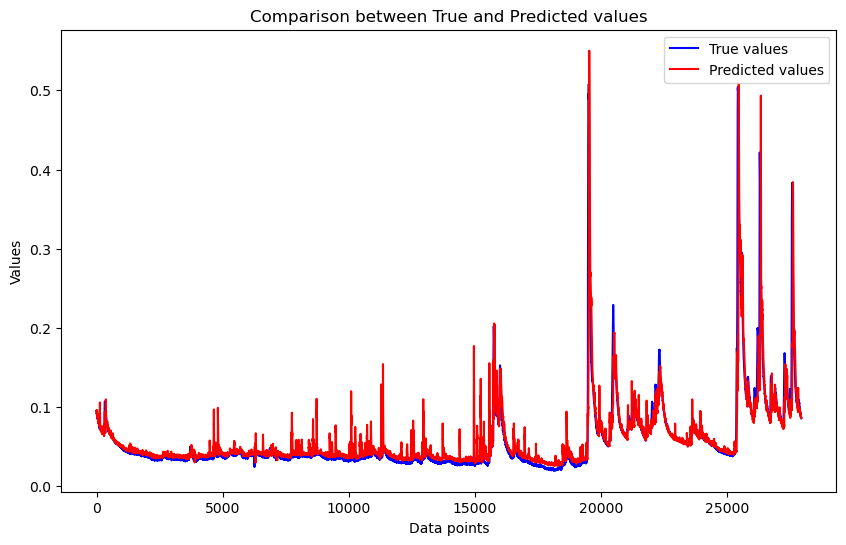

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Mor_48in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [41]:
def nse(y_test, pred_Ridge_Mor_48in_48out):
    numerator = np.sum((y_test - pred_Ridge_Mor_48in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Mor_48in_48out)
mae = mean_absolute_error(y_test, pred_Ridge_Mor_48in_48out)
nse_value = nse(y_test, pred_Ridge_Mor_48in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0006286221484269799
MAE: 0.00893304891653045
NSE: 0.7376571313993756


In [42]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_Ridge_Mor_48in_48out_1 = Ridge()

In [44]:
from sklearn.model_selection import GridSearchCV
grid_Ridge_Mor_48in_48out = GridSearchCV(grid_Ridge_Mor_48in_48out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Mor_48in_48out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

The default of alpha is already 1 so no futher model training is needed

In [45]:
best_ridge_params = grid_Ridge_Mor_48in_48out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [46]:
tuned_Ridge_Mor_48in_48out = Ridge(alpha=0.001)

In [47]:
tuned_Ridge_Mor_48in_48out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [48]:
pred_tuned_ridge_Mor_48in_48out = tuned_Ridge_Mor_48in_48out.predict(X_test)

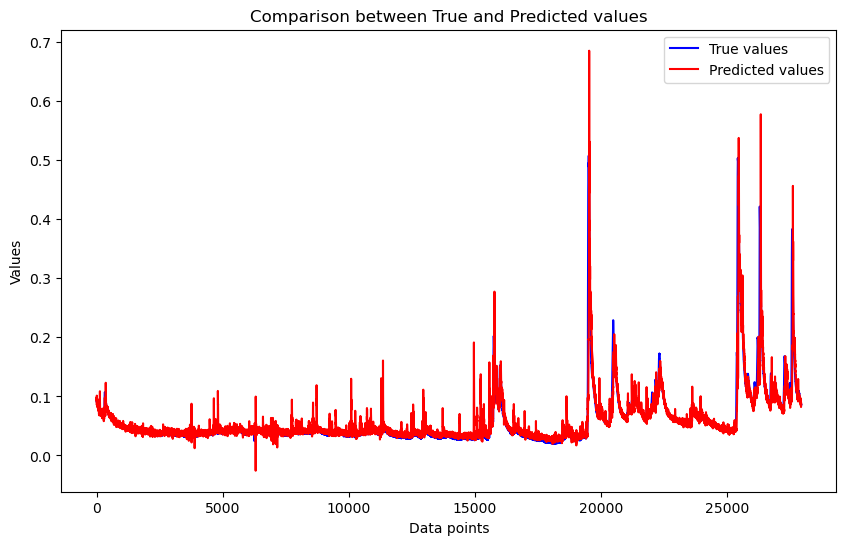

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Mor_48in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [50]:
def nse(y_test, pred_tuned_ridge_Mor_48in_48out):
    numerator = np.sum((y_test - pred_tuned_ridge_Mor_48in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Mor_48in_48out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Mor_48in_48out)
nse_value = nse(y_test, pred_tuned_ridge_Mor_48in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0006273833294976244
MAE: 0.00897700494166053
NSE: 0.738174127678328


In [ ]:
cv_scores_Mor_48in_32out_Ridge

In [51]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [52]:
Ridge_acomb_48in_32out = Ridge()
Ridge_acomb_48in_32out.fit(X_train, y_train)

Ridge()

In [53]:
pred_Ridge_acomb_48in_32out = Ridge_acomb_48in_32out.predict(X_test)

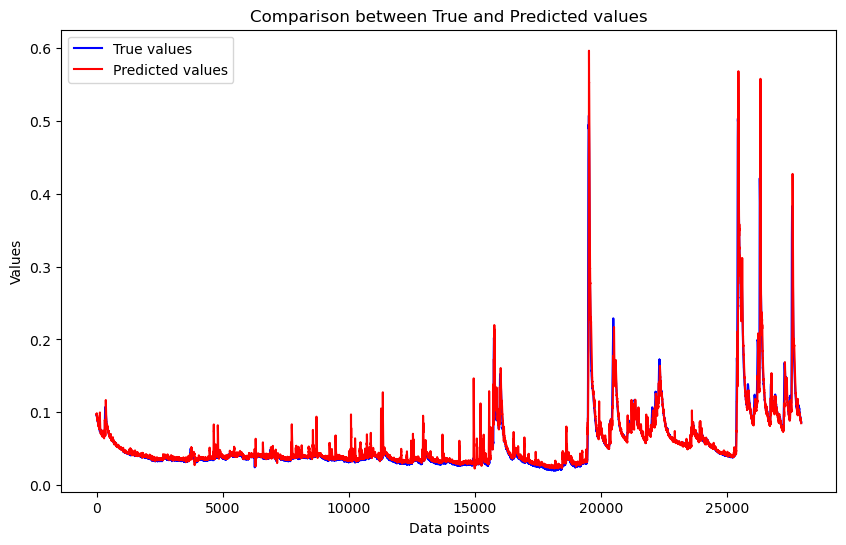

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_acomb_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [55]:
def nse(y_test, pred_Ridge_acomb_48in_32out):
    numerator = np.sum((y_test - pred_Ridge_acomb_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_acomb_48in_32out)
mae = mean_absolute_error(y_test, pred_Ridge_acomb_48in_32out)
nse_value = nse(y_test, pred_Ridge_acomb_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0003499903962368656
MAE: 0.006095814711648979
NSE: 0.8539055327482306


In [56]:
grid_Ridge_Mor_48in_32out_1 = Ridge()
grid_Ridge_Mor_48in_32out = GridSearchCV(grid_Ridge_Mor_48in_32out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Mor_48in_32out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [57]:
best_ridge_params = grid_Ridge_Mor_48in_32out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [63]:
tuned_Ridge_Mor_48in_32out = Ridge(alpha=0.001)

In [64]:
tuned_Ridge_Mor_48in_32out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [65]:
pred_tuned_Ridge_Mor_48in_32out = tuned_Ridge_Mor_48in_32out.predict(X_test)

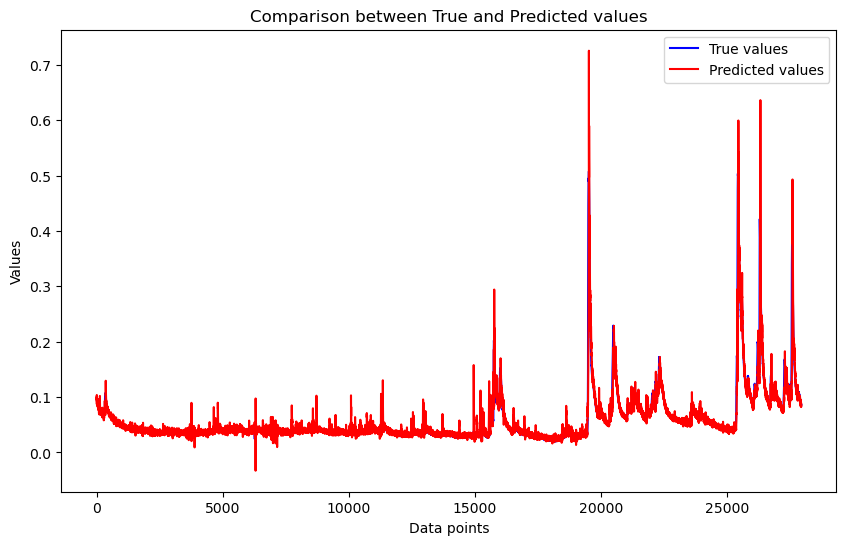

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_Ridge_Mor_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [67]:
def nse(y_test, pred_tuned_Ridge_Mor_48in_32out):
    numerator = np.sum((y_test - pred_tuned_Ridge_Mor_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_Ridge_Mor_48in_32out)
mae = mean_absolute_error(y_test, pred_tuned_Ridge_Mor_48in_32out)
nse_value = nse(y_test, pred_tuned_Ridge_Mor_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0003441437242215225
MAE: 0.006352726961771426
NSE: 0.8563460752387145


In [ ]:
cv_scores_Mor_48in_16out_Ridge

In [68]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [69]:
Ridge_Mor_48in_16out = Ridge()
Ridge_Mor_48in_16out.fit(X_train, y_train)

Ridge()

In [70]:
pred_Ridge_Mor_48in_16out = Ridge_Mor_48in_16out.predict(X_test)

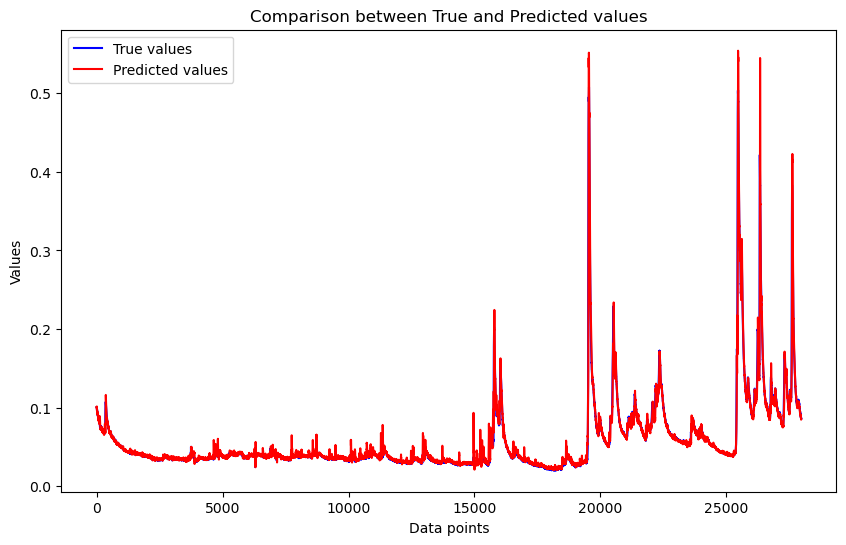

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Mor_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [72]:
def nse(y_test, pred_Ridge_Mor_48in_16out):
    numerator = np.sum((y_test - pred_Ridge_Mor_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Mor_48in_16out)
mae = mean_absolute_error(y_test, pred_Ridge_Mor_48in_16out)
nse_value = nse(y_test, pred_Ridge_Mor_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00011216514332066052
MAE: 0.003042444471429039
NSE: 0.9531721902089708


In [73]:
grid_Ridge_Mor_48in_16out_1 = Ridge()
grid_Ridge_Mor_48in_16out = GridSearchCV(grid_Ridge_Mor_48in_16out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Mor_48in_16out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [74]:
best_ridge_params = grid_Ridge_Mor_48in_16out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [75]:
tuned_Ridge_Mor_48in_16out = Ridge(alpha=0.001)
tuned_Ridge_Mor_48in_16out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [76]:
pred_tuned_ridge_Mor_48in_16out = tuned_Ridge_Mor_48in_16out.predict(X_test)

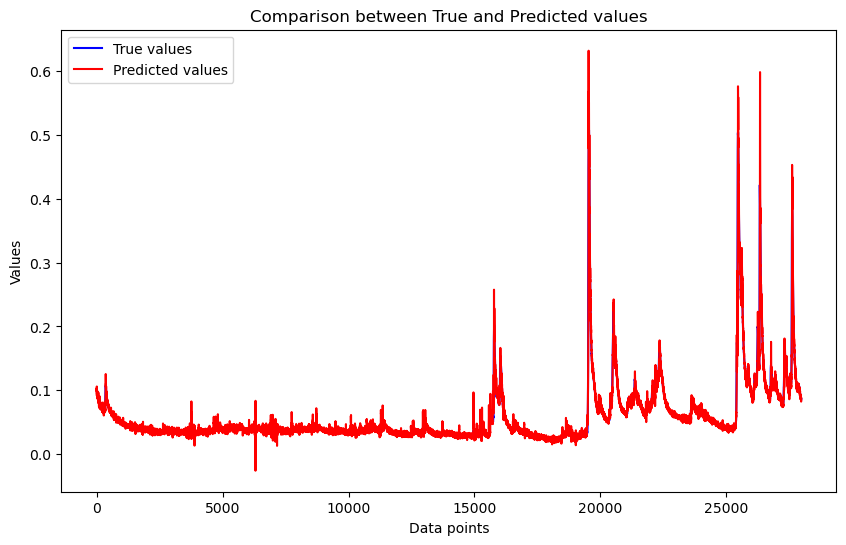

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Mor_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [78]:
def nse(y_test, pred_tuned_ridge_Mor_48in_16out):
    numerator = np.sum((y_test - pred_tuned_ridge_Mor_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Mor_48in_16out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Mor_48in_16out)
nse_value = nse(y_test, pred_tuned_ridge_Mor_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00010134814142709438
MAE: 0.0034718640950679182
NSE: 0.9576881787967357


In [ ]:
cv_scores_Mor_48in_8out_Ridge

In [79]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [80]:
Ridge_Mor_48in_8out = Ridge()
Ridge_Mor_48in_8out.fit(X_train, y_train)

Ridge()

In [81]:
pred_Ridge_Mor_48in_8out = Ridge_Mor_48in_8out.predict(X_test)

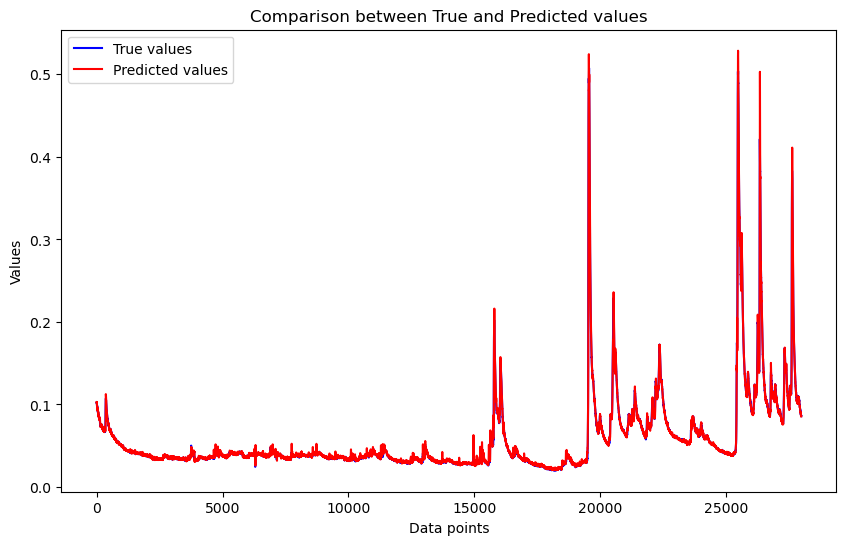

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Mor_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [83]:
def nse(y_test, pred_Ridge_Mor_48in_8out):
    numerator = np.sum((y_test - pred_Ridge_Mor_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Mor_48in_8out)
mae = mean_absolute_error(y_test, pred_Ridge_Mor_48in_8out)
nse_value = nse(y_test, pred_Ridge_Mor_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 2.945774168856984e-05
MAE: 0.0015396277562338967
NSE: 0.9877011410797054


In [84]:
grid_Ridge_Mor_48in_8out_1 = Ridge()
grid_Ridge_Mor_48in_8out = GridSearchCV(grid_Ridge_Mor_48in_8out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Mor_48in_8out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [85]:
best_ridge_params = grid_Ridge_Mor_48in_8out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [86]:
tuned_Ridge_Mor_48in_8out = Ridge(alpha=0.001)
tuned_Ridge_Mor_48in_8out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [87]:
pred_tuned_ridge_Mor_48in_8out = tuned_Ridge_Mor_48in_8out.predict(X_test)

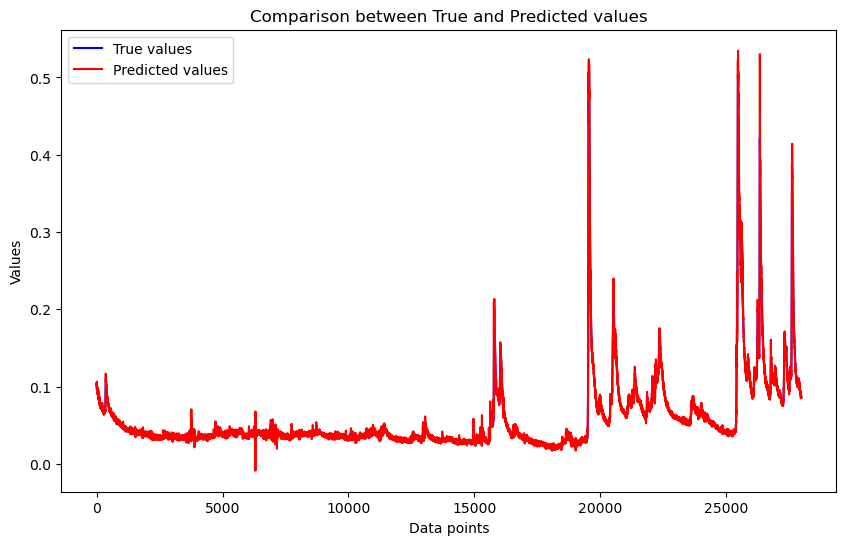

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Mor_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [89]:
def nse(y_test, pred_tuned_ridge_Mor_48in_8out):
    numerator = np.sum((y_test - pred_tuned_ridge_Mor_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Mor_48in_8out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Mor_48in_8out)
nse_value = nse(y_test, pred_tuned_ridge_Mor_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 2.3756076284723415e-05
MAE: 0.0018659770467388478
NSE: 0.9900816351160097


In [90]:
from joblib import dump
dump(Ridge_Mor_48in_8out, 'Ridge_Mor_48in_8out.joblib')

['Ridge_Mor_48in_8out.joblib']

In [91]:
dump(grid_Ridge_Mor_48in_48out, 'grid_Ridge_Mor_48in_48out.joblib')

['grid_Ridge_Mor_48in_48out.joblib']

In [92]:
dump(Ridge_Mor_48in_48out, 'Ridge_Mor_48in_48out.joblib')

['Ridge_Mor_48in_48out.joblib']

In [93]:
dump(grid_Ridge_Mor_48in_32out, 'grid_Ridge_Mor_48in_32out.joblib')

['grid_Ridge_Mor_48in_32out.joblib']

In [94]:
dump(Ridge_Mor_48in_32out, 'Ridge_Mor_48in_32out.joblib')

['Ridge_Mor_48in_32out.joblib']

In [98]:
dump(grid_Ridge_Mor_48in_16out, 'grid_Ridge_Mor_48in_16out.joblib')

['grid_Ridge_Mor_48in_16out.joblib']

In [96]:
dump(Ridge_Mor_48in_16out, 'Ridge_Mor_48in_16out.joblib')

['Ridge_Mor_48in_16out.joblib']

In [97]:
dump(grid_Ridge_Mor_48in_8out, 'grid_Ridge_Mor_48in_8out.joblib')

['grid_Ridge_Mor_48in_8out.joblib']